<a href="https://colab.research.google.com/github/aibak365/randow_to_try/blob/main/Copy_of_VifSlightChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
!pip install torchmetrics
from torchmetrics.image import VisualInformationFidelity


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
def tensor_to_image(tensor):
  """
  Converts a tensor representing an image to a PIL image object.

  Args:
      tensor: A tensor with shape (C, H, W) representing an image.
              C - number of channels (usually 3 for RGB)
              H - height of the image
              W - width of the image

  Returns:
      A PIL image object that can be displayed or saved.
  """
  # Check if number of channels is supported (RGB - 3 channels)


  # Move the channel dimension to be the last dimension
  tensor = tensor.permute(1, 2, 0)

  # If the tensor has only 1 channel, convert it to RGB by replicating the channel
  if tensor.size(0) == 1:
    tensor = tensor.repeat(3, 1, 1)

  # Clip values between 0 and 255 (assuming they are normalized)
  tensor = tensor.clamp(0, 1)

  # Convert the tensor to a NumPy array
  tensor = tensor.cpu().detach().numpy()

  # Convert the NumPy array to a uint8 array (uint8 for representing pixel values 0-255)
  image_array = (tensor * 255).astype(np.uint8)

  # Create a PIL image from the array
  return Image.fromarray(image_array)

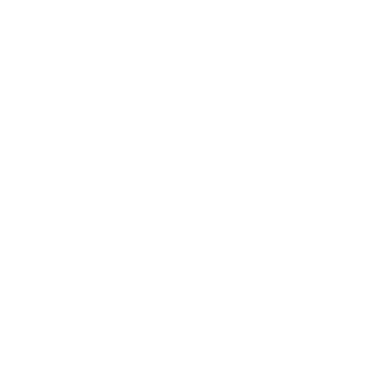

In [ ]:
reference = torch.full((1, 3, 256, 256), 255, dtype=torch.float32)


image = tensor_to_image(reference.squeeze(0))

# Save the image to a file
image.save("converted_image.jpg")
image1 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


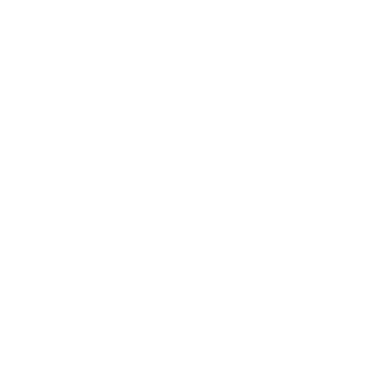

In [ ]:
test = torch.full((1, 3, 256, 256), 240, dtype=torch.float32) #pls try with 230 and see how it will be dropped dramtically

image = tensor_to_image(test.squeeze(0))
# Save the image to a file
image.save("converted_image_test.jpg")
image2 = Image.open("converted_image.jpg")
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()



In [ ]:
vif = VisualInformationFidelity()
# Create a tensor filled with 255

# Create a tensor filled with 240

# The variable was misspelled as 'refernce', correcting it to 'reference'
print(vif(reference, test))
print(vif(reference,reference))

tensor(0.9981)
tensor(1.)
